# Chapter 8 - Tree-based Methods

In [1]:
import itertools
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from tqdm import tqdm
%matplotlib inline

BASE_DIR = 'https://gitlab.com/machine-learning-course1/ml-practice-lg-2024-spring/-/raw/master/Notebooks'

In [2]:
# Ref https://www.kaggle.com/grfiv4/plot-a-confusion-matrix
def plot_confusion_matrix(
        y_true,
        y_pred,
        labels=None,
        target_names=None,
        normalize=False,
        cmap=plt.get_cmap('Blues'),
        title='Confusion matrix',
        figsize=(8, 6)):
    '''
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    y_true:       1d array-like
                  Ground truth (correct) target values.

    y_pred:       1d array-like
                  Estimated targets as returned by a classifier.

    labels:       array-like of shape (n_classes,), default=None
                  List of labels to index the matrix.
                  This may be used to reorder or select a subset of labels.
                  If None is given, those that appear at least once in y_true or y_pred are used in sorted order.

    target_names: array-like of shape (n_labels,)
                  Optional display names matching the labels (same order).

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    cmap:         The gradient of the values displayed from matplotlib.pyplot.cm
                  See http://matplotlib.org/examples/color/colormaps_reference.html

    title:        The text to display at the top of the matrix

    figsize:      The size of the figure
    '''

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=labels)

    # Create figure
    fig, ax = plt.subplots(figsize=figsize)

    # Plot confusion matrix
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)

    # Plot colorbar
    fig.colorbar(im)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Put numbers
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            ax.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            ax.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    tick_marks = np.arange(len(cm))
    if target_names is None:
        target_names = tick_marks
    ax.set_xticks(tick_marks, target_names)
    ax.set_yticks(tick_marks, target_names)
    ax.set_xlabel('Pred label')
    ax.set_ylabel('True label')
    ax.set_title(title)
    fig.tight_layout()
    fig.show()

## 1. Regression Trees

### 1.1. Analze Data

In [3]:
df = pd.read_csv(f'{BASE_DIR}/Data/Hitters.csv', index_col=0).dropna()
df.head(3)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N


In [4]:
df = pd.get_dummies(df, columns=['League', 'Division', 'NewLeague'], drop_first=True)
df.head(3)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,True,True,True
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,False,True,False
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,True,False,True


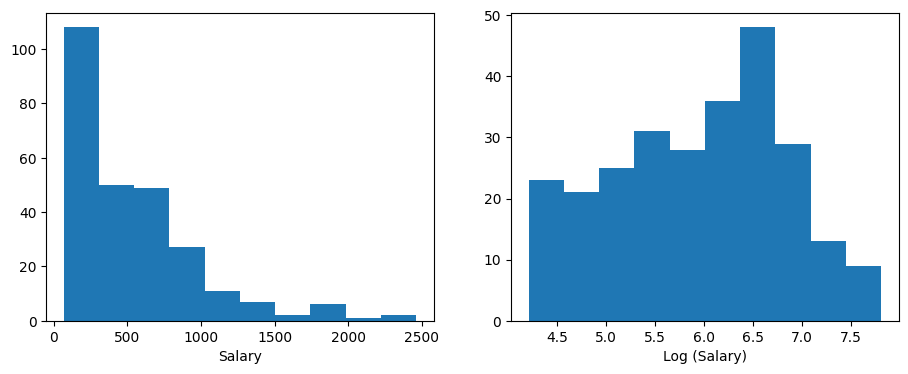

In [5]:
# Prepare X, Y
X = df[['Years', 'Hits']]
Y = np.log(df['Salary'])

fig, axes = plt.subplots(1, 2, figsize=(11,4))
axes[0].hist(df['Salary'])
axes[1].hist(Y)

axes[0].set_xlabel('Salary')
axes[1].set_xlabel('Log (Salary)')
plt.show()

### 1.2. Train Regression Tree

In [6]:
regr = DecisionTreeRegressor(max_leaf_nodes=3)
regr.fit(X, Y)

DecisionTreeRegressor(max_leaf_nodes=3)

### 1.3. Plot Tree

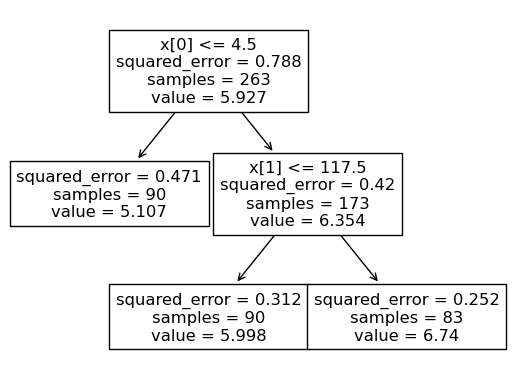

In [7]:
_ = plot_tree(regr)

### 1.4. Termination conditions

In [8]:
X = df.drop(columns=['Salary'])
Y = df['Salary']
X.head(3)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,True,True,True
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,False,True,False
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,True,False,True


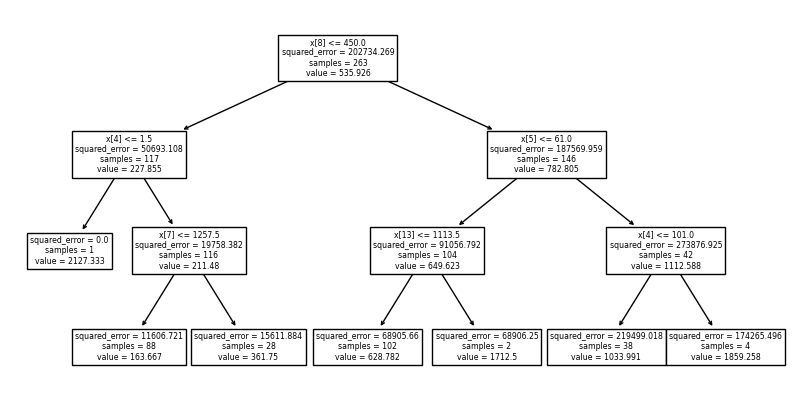

In [9]:
# max_depth
regr = DecisionTreeRegressor(max_depth=3)
regr.fit(X, Y)

fig, ax = plt.subplots(figsize=(10, 5))
_ = plot_tree(regr, ax=ax)
plt.show()

### 1.5. Exercise
Write your code in the cells below. (5min)
- Try various termination conditions.
- Ref: [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

### 1.6. Pruning

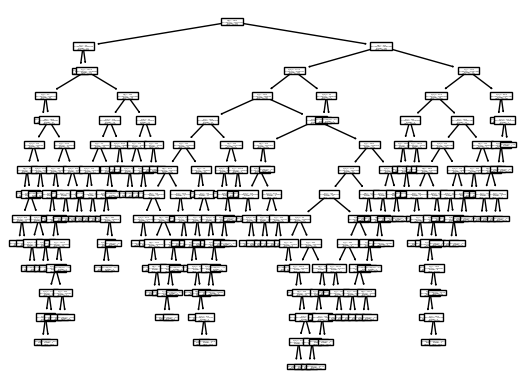

In [11]:
# Training (alpha=5)
regr = DecisionTreeRegressor(ccp_alpha=5)
regr.fit(X, Y)

_ = plot_tree(regr)

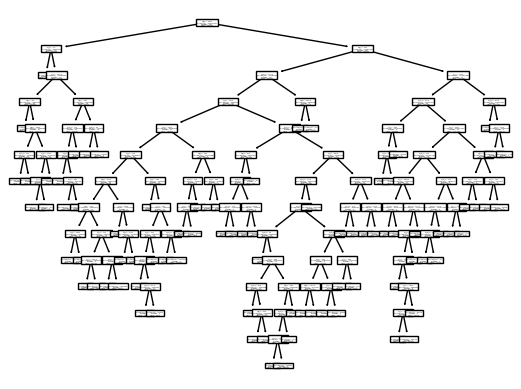

In [12]:
# Training (alpha=50)
regr = DecisionTreeRegressor(ccp_alpha=50)
regr.fit(X, Y)

_ = plot_tree(regr)

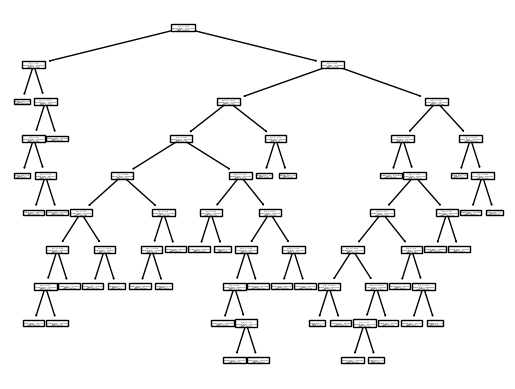

In [13]:
# Training (alpha=500)
regr = DecisionTreeRegressor(ccp_alpha=500)
regr.fit(X, Y)

_ = plot_tree(regr)

### 1.7. Exercise
Write your code in the cells below. (15min)
1. Prepare train / test data
2. Calculate cross validation error with different $\alpha$. (Use Mean Square Error (MSE))
3. Calculate test error with different $\alpha$. (Use Mean Square Error (MSE))
4. Plot a Graph with the errors (X: $\alpha$, y: Test error, CV error) and get the proper $\alpha$ with CV error.

#### 1.7.1. Prepare train / test data

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(210, 19) (53, 19) (210,) (53,)


#### 1.7.2. Calculate cross validation error with different $\alpha$. (Use Mean Square Error (MSE))

In [15]:
ccp_alphas = np.exp([0.1*x for x in range(200)])

cv_errors = []











#### 1.7.3. Calculate test error with different $\alpha$. (Use Mean Square Error (MSE))

In [16]:
test_errors = []











#### 1.7.4. Plot a Graph with the errors (X: $\alpha$, y: Test error, CV error) and get the proper $\alpha$ with CV error.

In [ ]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(np.log(ccp_alphas), cv_errors, label='cv')
ax.plot(np.log(ccp_alphas), test_errors, label='test')
ax.legend()
fig.show()

## 2. Classification Trees
### 2.1. Analyze Data

In [18]:
df = pd.read_csv(f'{BASE_DIR}/Data/Heart.csv', index_col=0).dropna()
df.head(3)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes


In [19]:
# Data => X, Y
X = df.drop(columns=['AHD', 'ChestPain', 'Thal'])
Y = df['AHD'].map({'Yes': 1, 'No': 0})
X.head(3)

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
1,63,1,145,233,1,2,150,0,2.3,3,0.0
2,67,1,160,286,0,2,108,1,1.5,2,3.0
3,67,1,120,229,0,2,129,1,2.6,2,2.0


### 2.2. Train Classification Tree

In [20]:
clf = DecisionTreeClassifier(max_leaf_nodes=6, max_features=3)
clf.fit(X, Y)

DecisionTreeClassifier(max_features=3, max_leaf_nodes=6)

### 2.3. Plot Tree

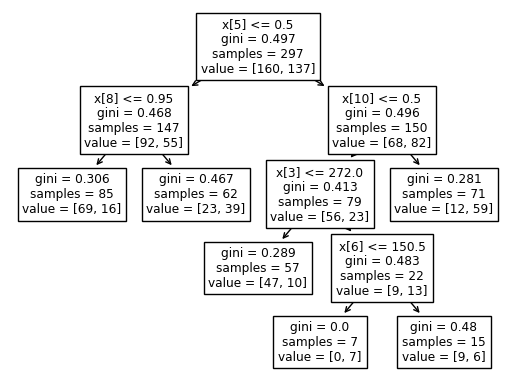

In [21]:
_ = plot_tree(clf)

### 2.4. Analyze the Result

In [22]:
clf.score(X, Y) # Mean accuracy

0.7744107744107744

## 3. Bagging and Random Forests

### 3.1. Analyze Data
Dataset Description: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

In [23]:
df = pd.read_csv(f'{BASE_DIR}/Data/Boston.csv')
df.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [24]:
# Data => X, Y
X = df.drop(columns=['medv'])
Y = df.medv

# Split Train/Test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=0)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(253, 13) (253, 13) (253,) (253,)


### 3.2. Create Random Forest Regressors with Various Number of Features

In [25]:
# Using all features
regr_all = RandomForestRegressor(max_features=13, random_state=1)
# Using half features
regr_half = RandomForestRegressor(max_features=6, random_state=1)
# Using sqrt(p) features
regr_sqrt = RandomForestRegressor(max_features=4, random_state=1)

regr_all.fit(X_train, Y_train)
regr_half.fit(X_train, Y_train)
regr_sqrt.fit(X_train, Y_train)

RandomForestRegressor(max_features=4, random_state=1)

### 3.3. Train and Evaluate the Regressors

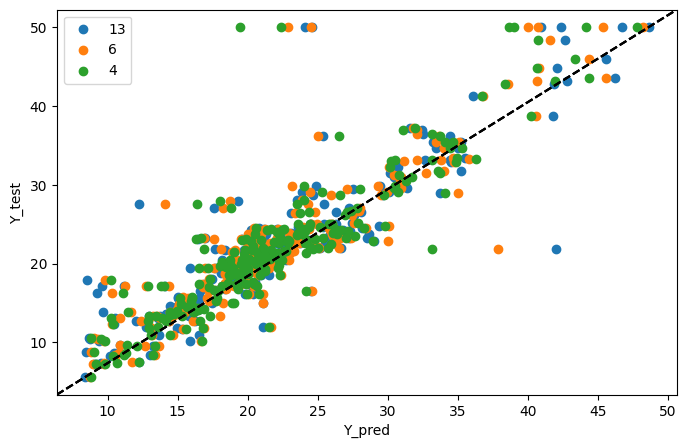

In [26]:
# Compare results
fig, ax = plt.subplots(figsize=(8, 5))

MSEs = []
for regr in [regr_all, regr_half, regr_sqrt]:
    Y_pred = regr.predict(X_test)
    MSE = mean_squared_error(Y_test, Y_pred)
    MSEs.append(MSE)

    ax.scatter(Y_pred, Y_test, label=regr.max_features)
    ax.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
    ax.set_xlabel('Y_pred')
    ax.set_ylabel('Y_test')
ax.legend()
plt.show()

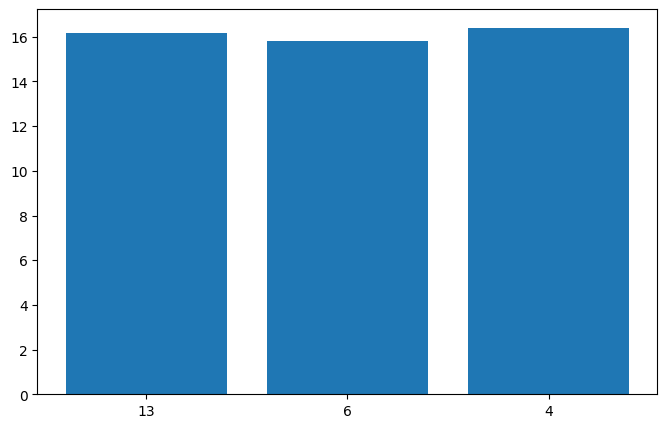

In [27]:
# Mean Square Errors
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(['13', '6', '4'], MSEs)
plt.show()

### 3.4. Plot Feature Importances

In [28]:
regr_all.feature_importances_

array([0.03528629, 0.00114356, 0.00794199, 0.00101602, 0.01075332,
       0.32944791, 0.01643057, 0.04369569, 0.00443421, 0.01297369,
       0.02197934, 0.01127816, 0.50361926])

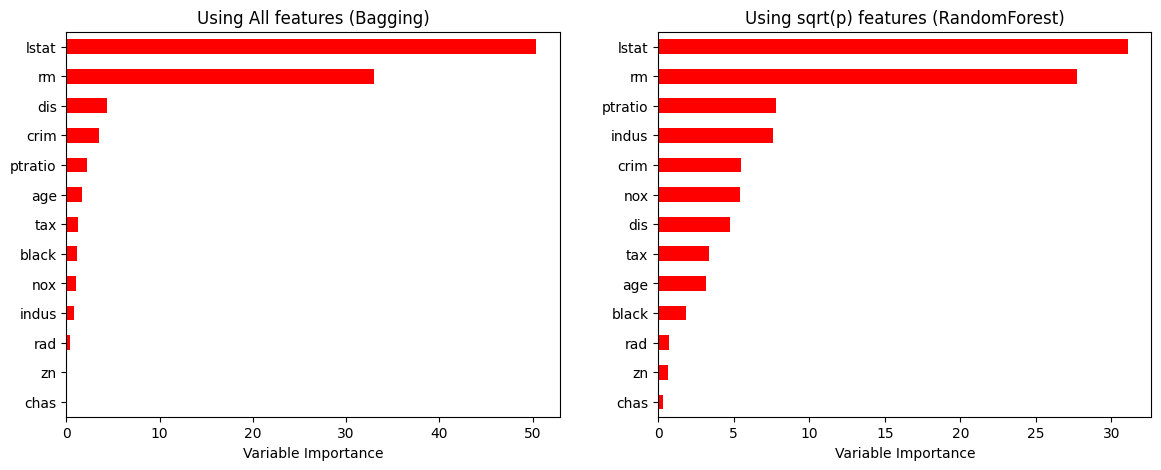

In [29]:
## Feature Importance
# Using all features
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

importance_all = pd.DataFrame({'Importance': regr_all.feature_importances_*100}, index=X.columns)
importance_sqrt = pd.DataFrame({'Importance': regr_sqrt.feature_importances_*100}, index=X.columns)

importance_all.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', ax=axes[0])
importance_sqrt.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', ax=axes[1])

axes[0].set_title('Using All features (Bagging)')
axes[1].set_title('Using sqrt(p) features (RandomForest)')

axes[0].set_xlabel('Variable Importance')
axes[1].set_xlabel('Variable Importance')
axes[0].get_legend().remove()
axes[1].get_legend().remove()
plt.show()

### 3.5. Exercise
Write your code in the cells below. (10min)<br/>
Use *Hitters* dataset<br/>
Predict `Salary` using other features.
1. Load data
2. Preprocess data
3. Split train / test data
4. Train random forest regressor with train data
5. Compare feature importances

#### 3.5.1. Load data

In [30]:
df = pd.read_csv(f'{BASE_DIR}/Data/Hitters.csv', index_col=0).dropna()
df = pd.get_dummies(df, columns=['League', 'Division', 'NewLeague'], drop_first=True)
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,True,True,True
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,False,True,False
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,True,False,True
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,True,False,True
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0,False,True,False


#### 3.5.2. Preprocess data

In [31]:
X = df.drop(columns=['Salary']).dropna()
Y = df['Salary']
print(X.shape, Y.shape)

(263, 19) (263,)


#### 3.5.3. Split train / test data

#### 3.5.4. Train random forest regressor with train data

#### 3.5.5. Compare feature importances

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))





ax.set_title('Train')
ax.set_xlabel('Variable Importance')
ax.get_legend().remove()
plt.show()

### 3.6. Boosting

In [35]:
df = pd.read_csv(f'{BASE_DIR}/Data/Boston.csv')
df.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [36]:
# Data => X, Y
X = df.drop(columns=['medv'])
Y = df['medv']

# Split Train/Test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=0)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(253, 13) (253, 13) (253,) (253,)


In [37]:
regr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, random_state=1)
regr.fit(X_train, Y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=500, random_state=1)

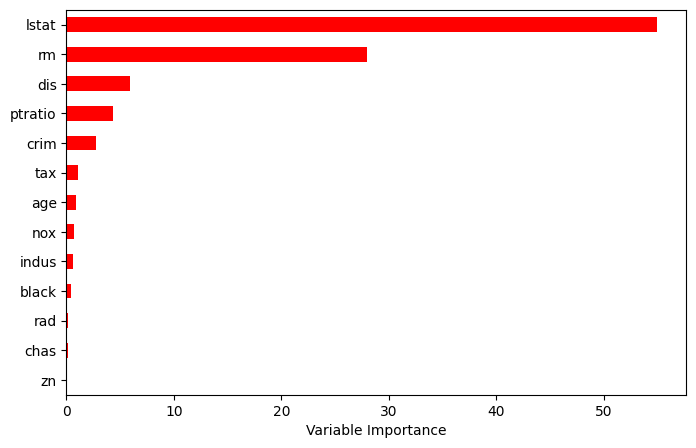

In [38]:
# Feature Importances
fig, ax = plt.subplots(figsize=(8, 5))

importance = pd.Series(regr.feature_importances_*100, index=X.columns)
importance.sort_values(inplace=False).plot(kind='barh', color='r', ax=ax)

ax.set_xlabel('Variable Importance')
plt.show()

### 3.7. Exercise
Write your code in the cells below. (10min)
1. Calculate train and test errors with various Number of Trees. (Use MSE)
2. Plot graph (X: number of trees, y: train error, test error)

In [39]:
# Calculate train and test errors with various Number of Trees. (Use MSE)
n_estimators_list = [500*x for x in range(1, 21)]

train_errors, test_errors = [], []
for n_estimators in tqdm(n_estimators_list):
    pass










100%|██████████| 20/20 [01:38<00:00,  4.95s/it]


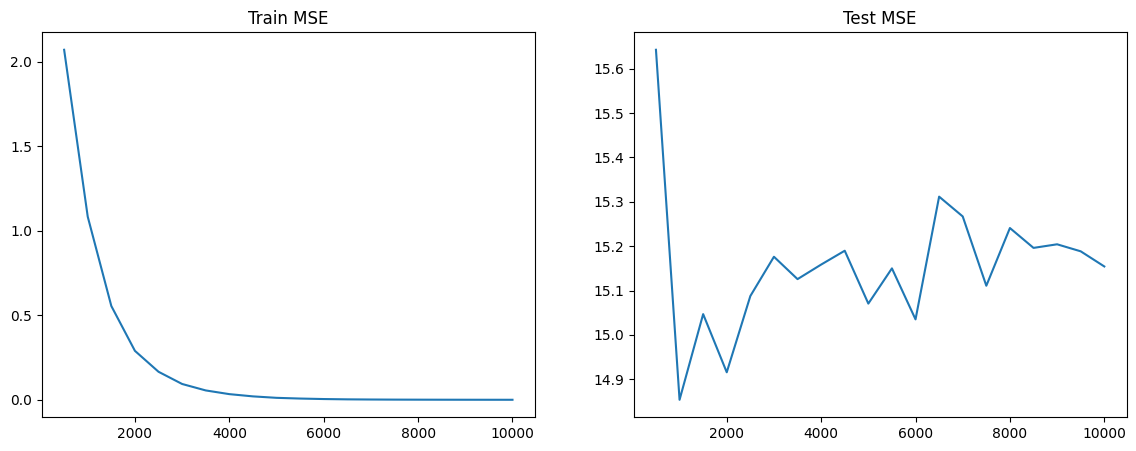

In [40]:
# Plot graph (X: number of trees, y: train error, test error)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].plot(n_estimators_list, train_errors)
axes[1].plot(n_estimators_list, test_errors)

axes[0].set_title('Train MSE')
axes[1].set_title('Test MSE')
fig.show()

## 4. Bagging, Voting
### 4.1. BaggingRegressor

In [41]:
# Load data
df = pd.read_csv(f'{BASE_DIR}/Data/Boston.csv')

# Data => X, Y
X = df.drop(columns=['medv'])
Y = df['medv']

# Split Train/Test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=0)

In [42]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((253, 13), (253, 13), (253,), (253,))

25.784031620553353 16.601541501976286


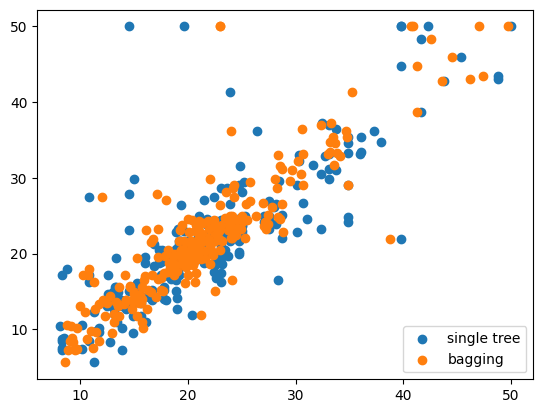

In [43]:
regr = DecisionTreeRegressor()
regr.fit(X_train, Y_train)
Y_pred = regr.predict(X_test)

MSE_decision_tree = mean_squared_error(Y_test, Y_pred)
plt.scatter(Y_pred, Y_test, label='single tree')

regr = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=10, random_state=0)
regr.fit(X_train, Y_train)
Y_pred = regr.predict(X_test)

MSE_bagging = mean_squared_error(Y_test, Y_pred)
plt.scatter(Y_pred, Y_test, label='bagging')
plt.legend()

print(MSE_decision_tree, MSE_bagging)

### 4.2. BaggingClassifier

In [44]:
# Load data
df = pd.read_csv(f'{BASE_DIR}/Data/Carseats.csv', index_col=0)
df = pd.get_dummies(df, columns=['ShelveLoc', 'Urban', 'US'])
df.head(3)

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
1,9.50,138,73,11,276,120,42,17,True,False,False,False,True,False,True
2,11.22,111,48,16,260,83,65,10,False,True,False,False,True,False,True
3,10.06,113,35,10,269,80,59,12,False,False,True,False,True,False,True


In [45]:
# Add High predictor
df['High'] = df['Sales'].map(lambda x: 1 if x>8 else 0)

# Data => X, Y
X = df.drop(['Sales', 'High'], axis=1)
Y = df['High']

# Split train/test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=0)
print (X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(200, 14) (200, 14) (200,) (200,)


              precision    recall  f1-score   support

           0       0.74      0.82      0.78       118
           1       0.70      0.59      0.64        82

    accuracy                           0.73       200
   macro avg       0.72      0.70      0.71       200
weighted avg       0.72      0.72      0.72       200



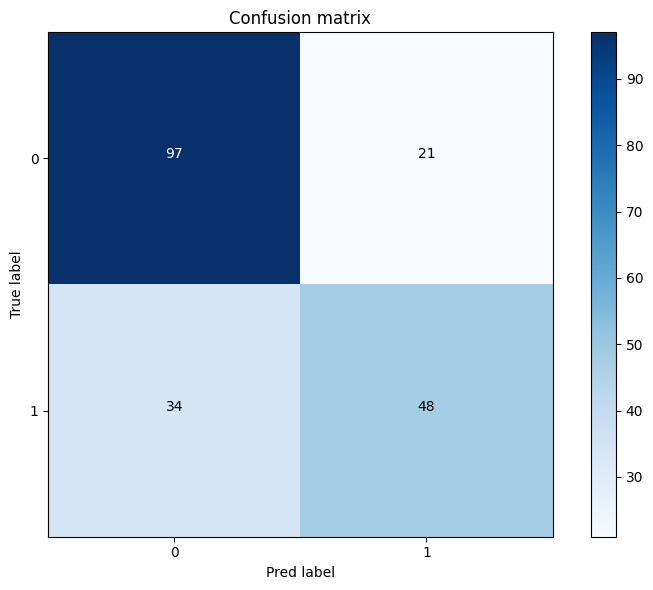

In [46]:
# Single Decision Tree
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

print(classification_report(Y_test, Y_pred))
plot_confusion_matrix(Y_test, Y_pred, target_names=clf.classes_)

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       118
           1       0.79      0.63      0.70        82

    accuracy                           0.78       200
   macro avg       0.78      0.76      0.76       200
weighted avg       0.78      0.78      0.78       200



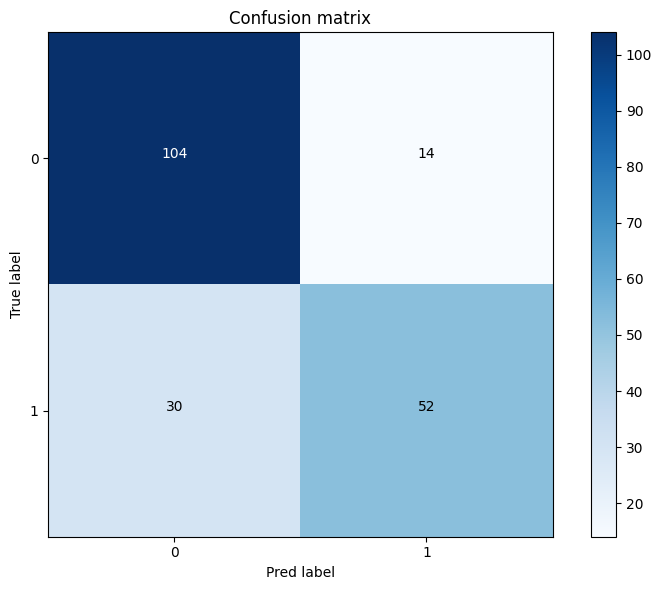

In [47]:
# Decision Tree with Bagging
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=0)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

print(classification_report(Y_test, Y_pred))
plot_confusion_matrix(Y_test, Y_pred, target_names=clf.classes_)

### 4.3. VotingClassifier

In [48]:
clf = VotingClassifier([
    ('lr', LogisticRegression(multi_class='multinomial', random_state=0)),
    ('rf', RandomForestClassifier(n_estimators=50, random_state=0)),
    ('gnb', GaussianNB()),
], voting='hard')

clf.get_params()

{'estimators': [('lr',
   LogisticRegression(multi_class='multinomial', random_state=0)),
  ('rf', RandomForestClassifier(n_estimators=50, random_state=0)),
  ('gnb', GaussianNB())],
 'flatten_transform': True,
 'n_jobs': None,
 'verbose': False,
 'voting': 'hard',
 'weights': None,
 'lr': LogisticRegression(multi_class='multinomial', random_state=0),
 'rf': RandomForestClassifier(n_estimators=50, random_state=0),
 'gnb': GaussianNB(),
 'lr__C': 1.0,
 'lr__class_weight': None,
 'lr__dual': False,
 'lr__fit_intercept': True,
 'lr__intercept_scaling': 1,
 'lr__l1_ratio': None,
 'lr__max_iter': 100,
 'lr__multi_class': 'multinomial',
 'lr__n_jobs': None,
 'lr__penalty': 'l2',
 'lr__random_state': 0,
 'lr__solver': 'lbfgs',
 'lr__tol': 0.0001,
 'lr__verbose': 0,
 'lr__warm_start': False,
 'rf__bootstrap': True,
 'rf__ccp_alpha': 0.0,
 'rf__class_weight': None,
 'rf__criterion': 'gini',
 'rf__max_depth': None,
 'rf__max_features': 'sqrt',
 'rf__max_leaf_nodes': None,
 'rf__max_samples': Non

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       118
           1       0.91      0.83      0.87        82

    accuracy                           0.90       200
   macro avg       0.90      0.88      0.89       200
weighted avg       0.90      0.90      0.89       200



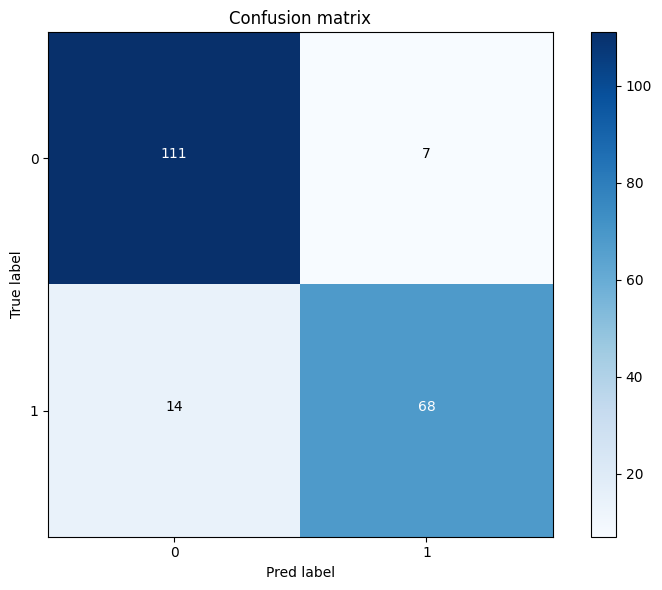

In [49]:
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

print(classification_report(Y_test, Y_pred))
plot_confusion_matrix(Y_test, Y_pred, target_names=clf.classes_)

### 4.4. Exercise
Write your code in the cells below.<br/>
Dataset Description: https://rdrr.io/cran/ISLR/man/Carseats.html
- Given
  1. Load *Carseats* Dataset
  2. Preprocess the Data
  3. Add `High` predictor with `Sales`
  4. Prepare X, Y
  5. Split train / test data
- To do
  - Estimate test data with train data.

In [50]:
# Load Carseats data
df = pd.read_csv(f'{BASE_DIR}/Data/Carseats.csv', index_col=0)
df = pd.get_dummies(df, columns=['ShelveLoc', 'Urban', 'US'])
df.head(3)

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
1,9.50,138,73,11,276,120,42,17,True,False,False,False,True,False,True
2,11.22,111,48,16,260,83,65,10,False,True,False,False,True,False,True
3,10.06,113,35,10,269,80,59,12,False,False,True,False,True,False,True


In [51]:
# Add High predictor with Sales
df['High'] = df['Sales'].map(lambda x: 1 if x > 8 else 0)
display(df.head(3))

# Prepare X, Y
X = df.drop(['Sales', 'High'], axis=1)
Y = df['High']

# Split train / test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=0)

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,High
1,9.50,138,73,11,276,120,42,17,True,False,False,False,True,False,True,1
2,11.22,111,48,16,260,83,65,10,False,True,False,False,True,False,True,1
3,10.06,113,35,10,269,80,59,12,False,False,True,False,True,False,True,1


In [52]:
## Estimate test data with train data




